<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/tsne_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique primarily used for visualizing high-dimensional datasets. Unlike linear methods like PCA, t-SNE is particularly good at preserving the local structure of the data, making it effective for revealing clusters and relationships between data points in a lower-dimensional space (typically 2D or 3D).

Here are some key aspects of t-SNE:

*   **Focus on Local Structure:** t-SNE aims to map high-dimensional data points to a lower-dimensional space such that the pairwise similarities between points are preserved. It does this by modeling the probability distribution of pairwise similarities in both the high-dimensional and low-dimensional spaces and minimizing the difference between these distributions. The "t-distributed" part comes from using a heavy-tailed Student's t-distribution in the low-dimensional space to model similarities, which helps to alleviate the "crowding problem" where points from different clusters can be squeezed together.

*   **Non-linear:** t-SNE is a non-linear technique, meaning it can capture complex, non-linear relationships in the data that linear methods might miss. This makes it suitable for visualizing data with intricate structures, such as the manifold-like data often seen in single-cell genomics or image datasets.

*   **Visualization Tool:** While t-SNE can be used for dimensionality reduction, its primary strength lies in creating insightful visualizations. The plots it generates can reveal clusters, outliers, and the overall shape of the data distribution in a way that is often more interpretable than linear methods for complex data.

*   **Perplexity Parameter:** A key parameter in t-SNE is `perplexity`. This parameter can be thought of as a knob that tunes the balance between focusing on local and global structure. It's related to the number of nearest neighbors considered for each point. Choosing an appropriate perplexity is important for obtaining a meaningful visualization, and it often requires some experimentation.

*   **Interpretation Caution:** It's important to interpret t-SNE plots with caution. The distances between clusters in a t-SNE plot may not accurately reflect the true distances in the high-dimensional space. t-SNE is excellent at showing *whether* clusters exist and how points are related within those clusters, but the relative spacing and size of the clusters themselves should not be over-interpreted as precise measures of distance or density in the original data.

In summary, t-SNE is a powerful visualization tool for exploring the structure of high-dimensional data, especially when that structure is non-linear and involves distinct clusters.

In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

First 5 rows of the iris dataset (without pandas):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


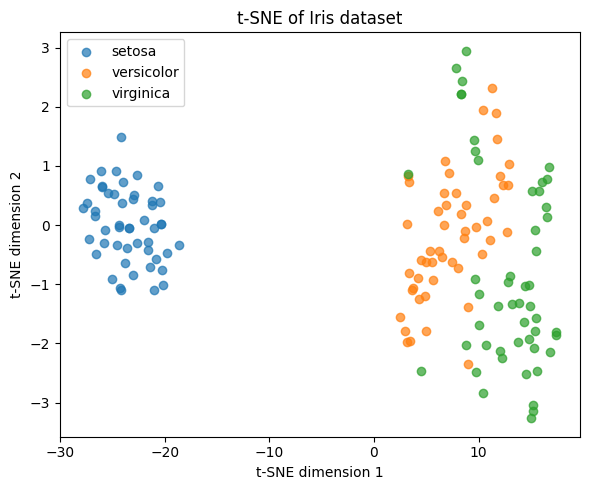

In [23]:
# 1. Load example data (Iris measurements: sepal/petal length & width)
iris = datasets.load_iris()

# Convert the iris dataset to a DataFrame to use the head() method
#iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#display(iris_df.head()) # Use display() for better output formatting

# Display the first 5 rows of the data
print("First 5 rows of the iris dataset (without pandas):")
print(iris.data[:5])

# Optionally, display the feature names
print("\nFeature names:")
print(iris.feature_names)

X = iris.data            # shape (150, 4)
y = iris.target          # 0=setosa, 1=versicolor, 2=virginica
target_names = iris.target_names

# 2. Standardize features (mean=0, var=1) – important for t‑SNE distance computations
X_scaled = StandardScaler().fit_transform(X)

# 3. Run t‑SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2,        # project down to 2D
            perplexity=30,         # roughly how many neighbours to consider
            max_iter=1000)#,           # number of optimization steps
#            random_state=42)       # for reproducibility
X_tsne = tsne.fit_transform(X_scaled)

# 4. Put results into a DataFrame for easy plotting
df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Species': [target_names[i] for i in y]
})

# 5. Plot
plt.figure(figsize=(6, 5))
for species in target_names:
    ix = df['Species'] == species
    plt.scatter(df.loc[ix, 'TSNE1'],
                df.loc[ix, 'TSNE2'],
                label=species,
                alpha=0.7)
plt.title("t-SNE of Iris dataset")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.legend()
plt.tight_layout()
plt.show()

## Activity

Play around with the notebook

* https://distill.pub/2016/misread-tsne/

## References

[1] https://distill.pub/2016/misread-tsne/